In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("adult.csv",na_values='?')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [6]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [8]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

<AxesSubplot:>

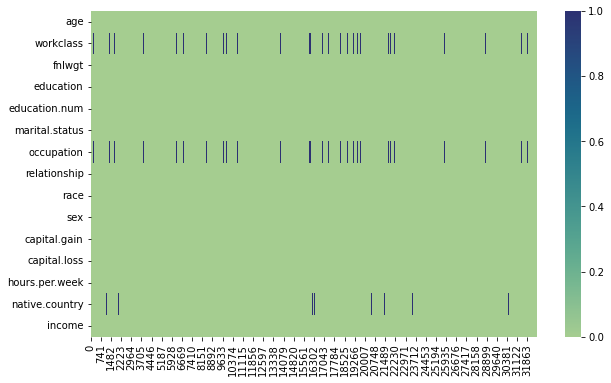

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
           cmap="crest")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [13]:
numerical_feature=[i for i in df.columns if df[i].dtype!='O']
categorical_feature=[i for i in df.columns if df[i].dtype=='O']

In [14]:
numerical_feature

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [15]:
categorical_feature

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

## Univariate analysis

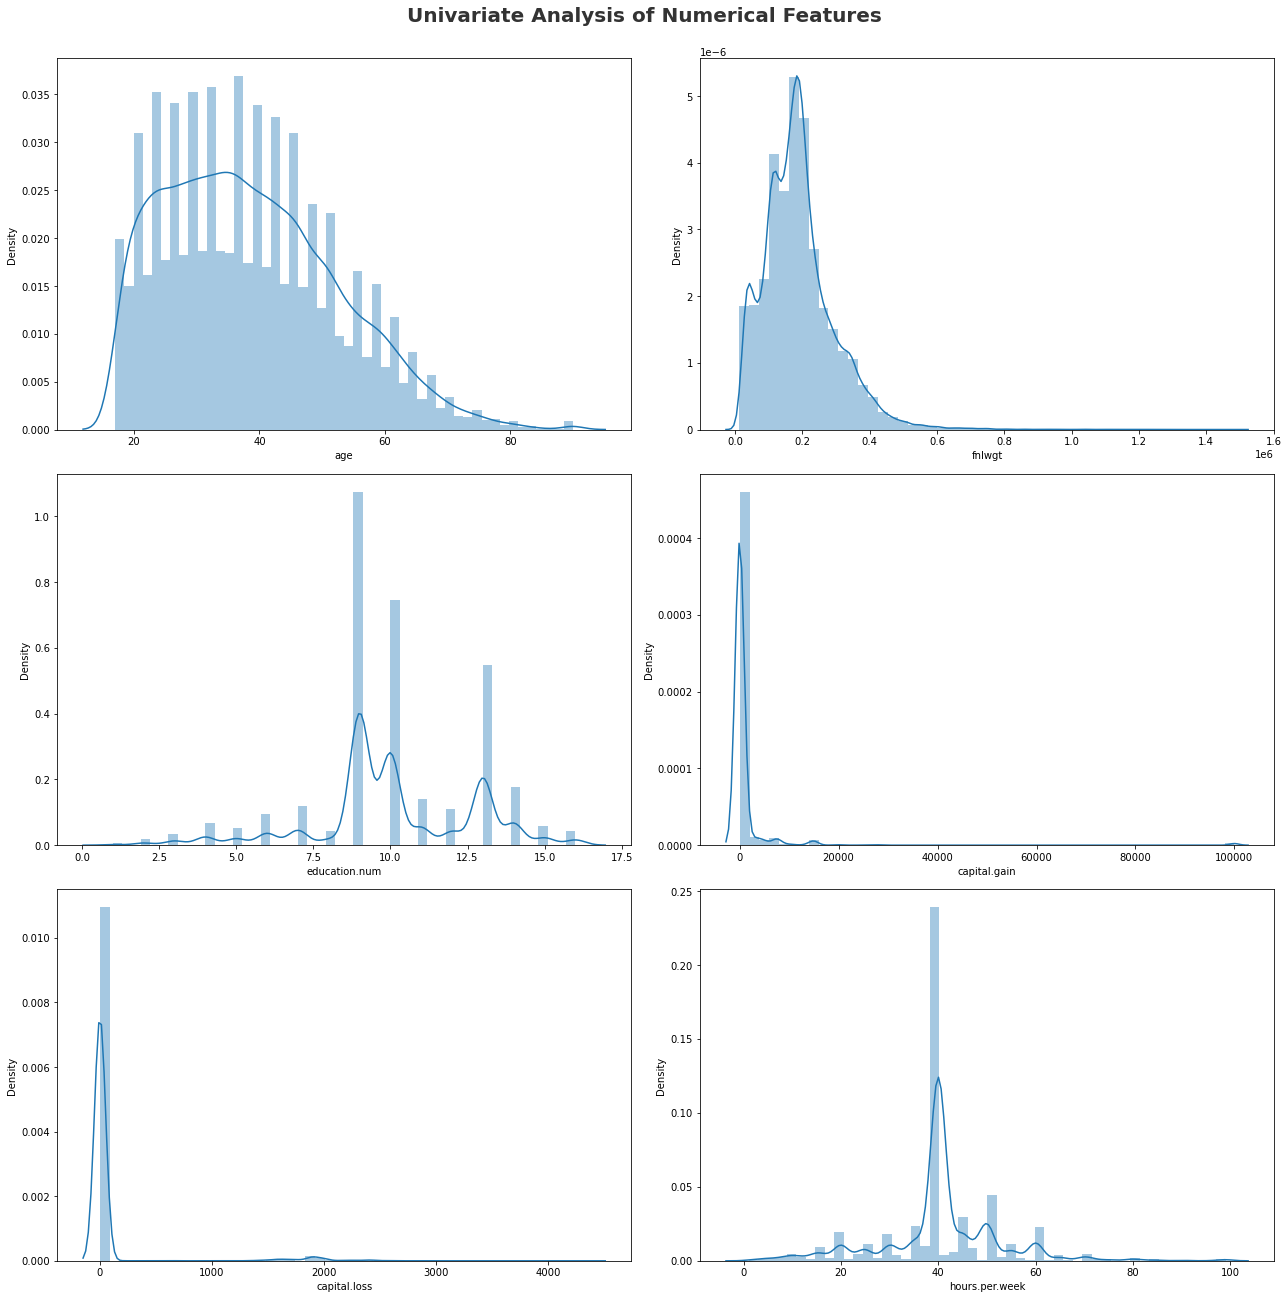

In [16]:
plt.figure(figsize=(18,18))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_feature)):
    plt.subplot(3, 2, i+1)
    sns.distplot(df[numerical_feature[i]],label='income')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

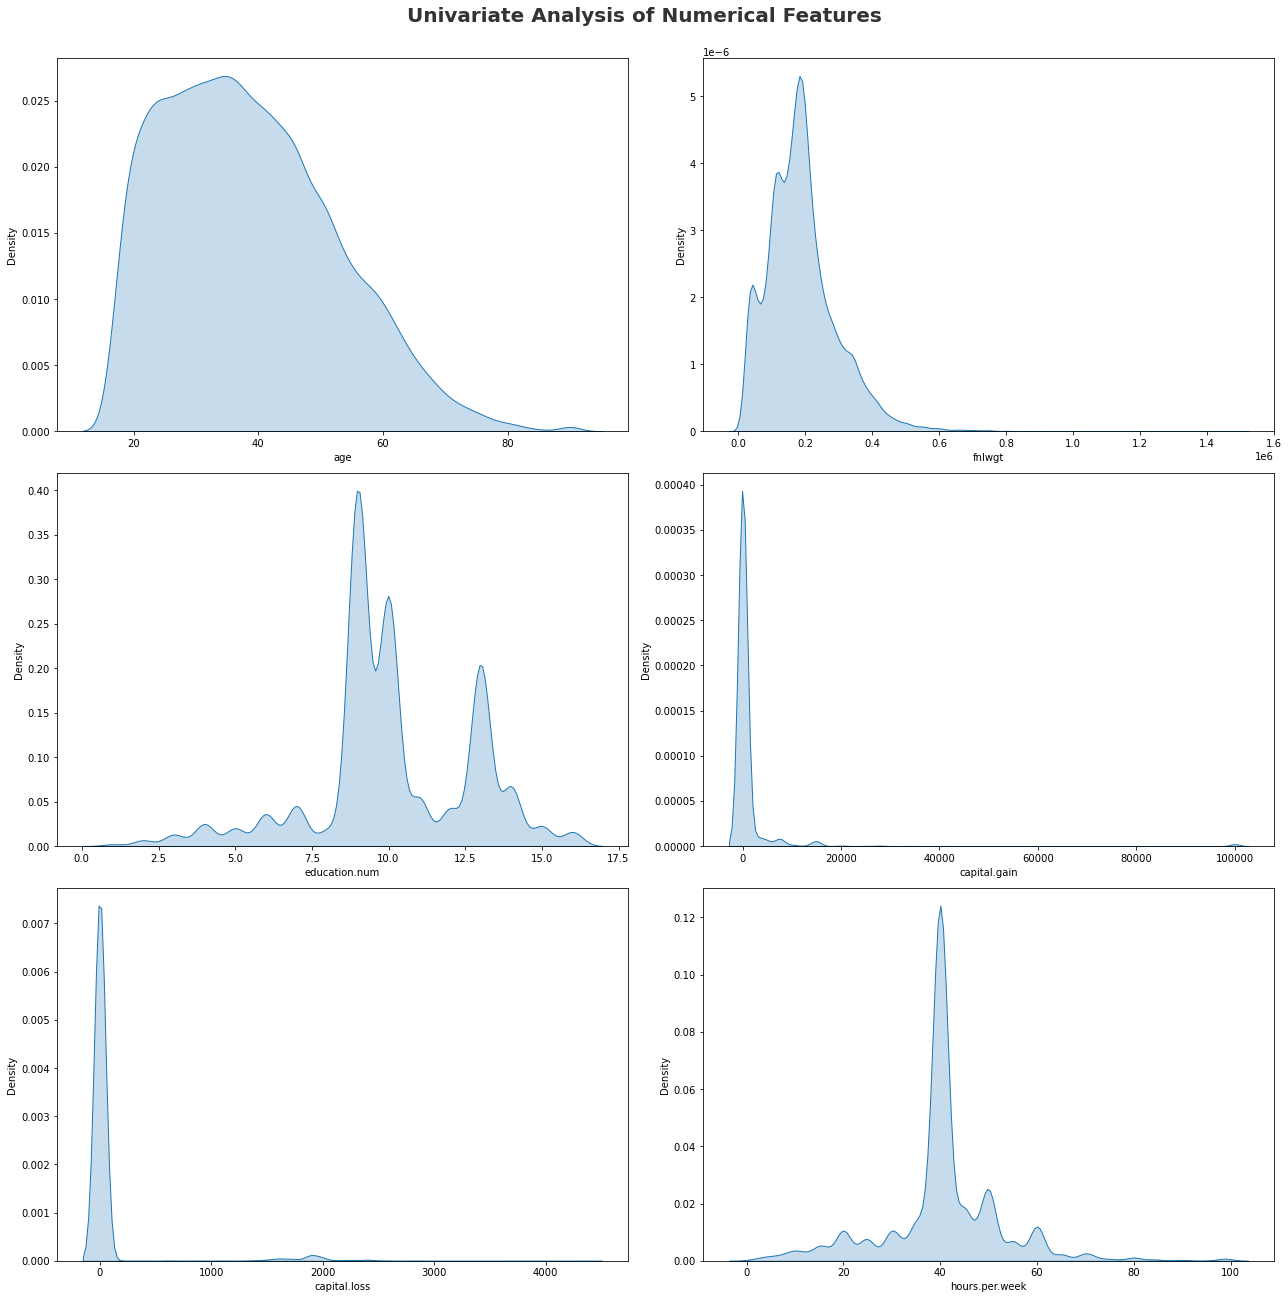

In [17]:
plt.figure(figsize=(18,18))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_feature)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=df[numerical_feature[i]],shade=True,data=df)
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

In [18]:
def cate_feature(df,categorical_feature):
    plt.figure(figsize=(22,8))
    a=df[df['income']=='<=50K'][categorical_feature].value_counts() # Below 50k salary
    b=df[df['income']=='>50K'][categorical_feature].value_counts() # Above 50k salary
    plt.subplot(1,2,1)
    plt.title('Below 50K salary')
    sns.barplot(a.index,a.values)
    plt.subplot(1,2,2)
    plt.title('Above 50K salary')
    sns.barplot(b.index,b.values)
    plt.show()
  

workclass :



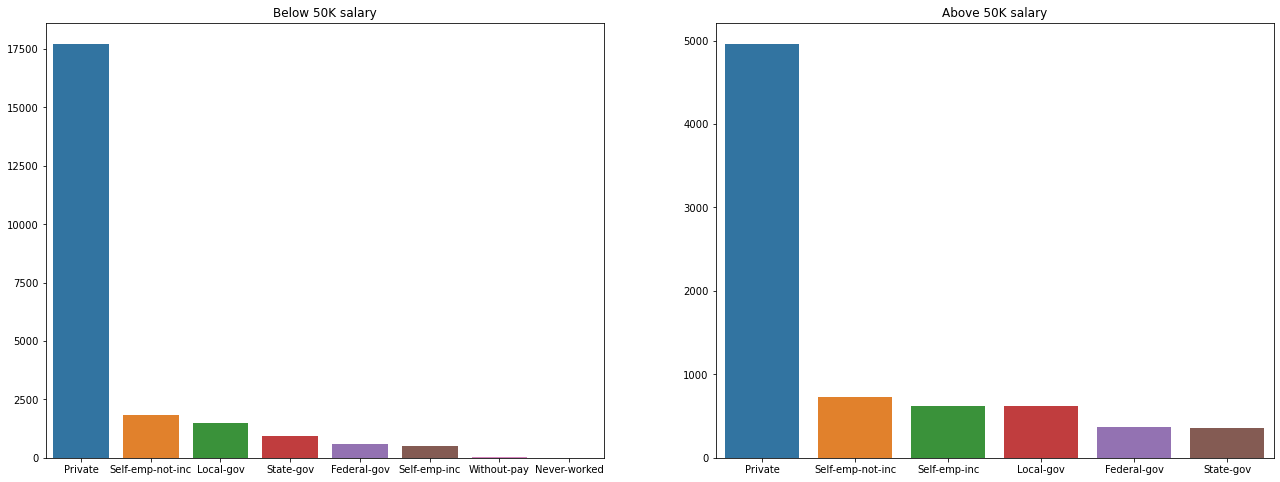

education :



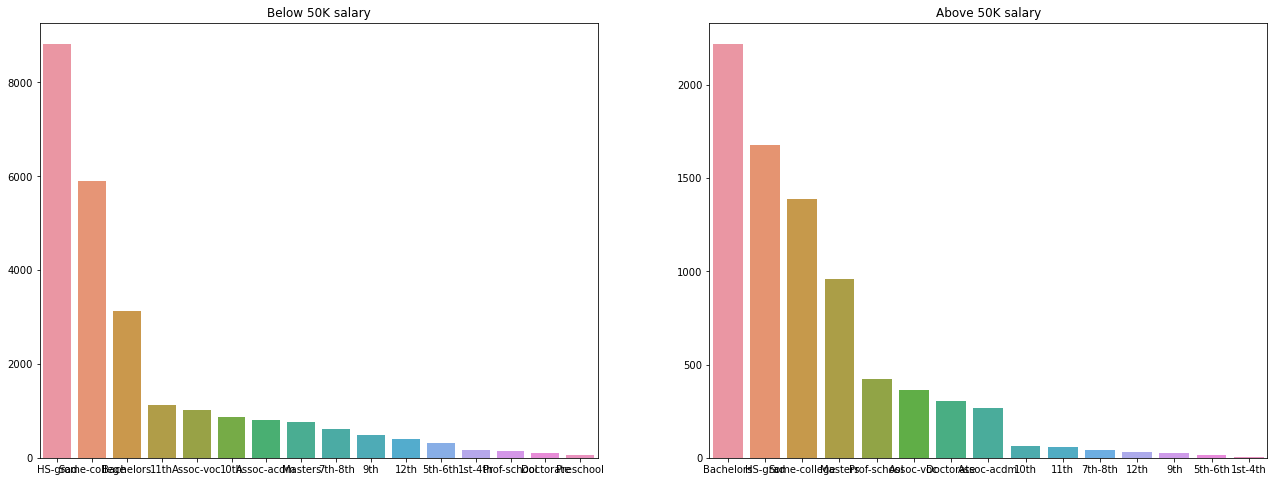

marital.status :



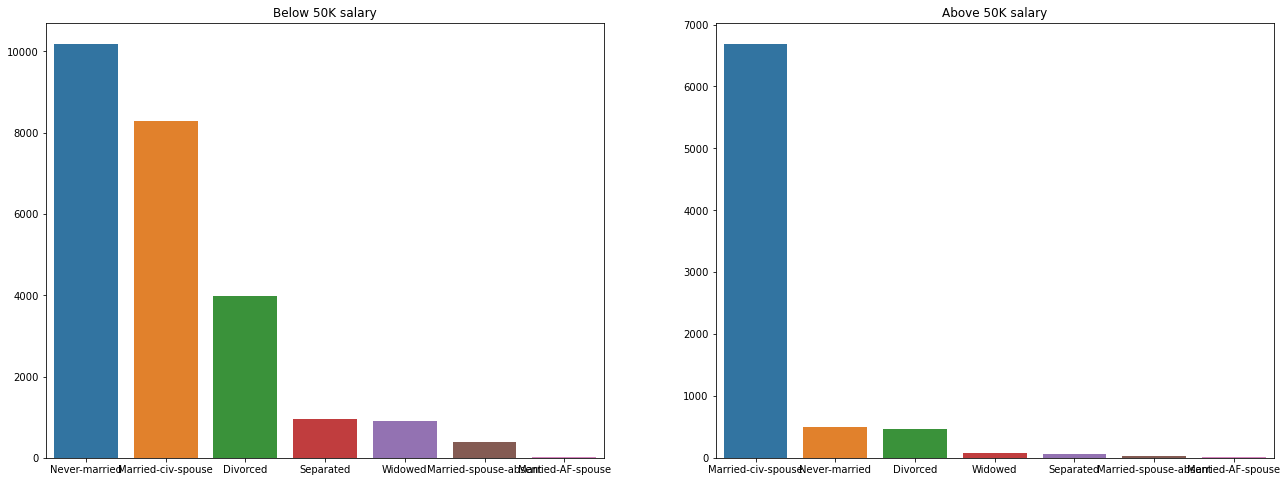

occupation :



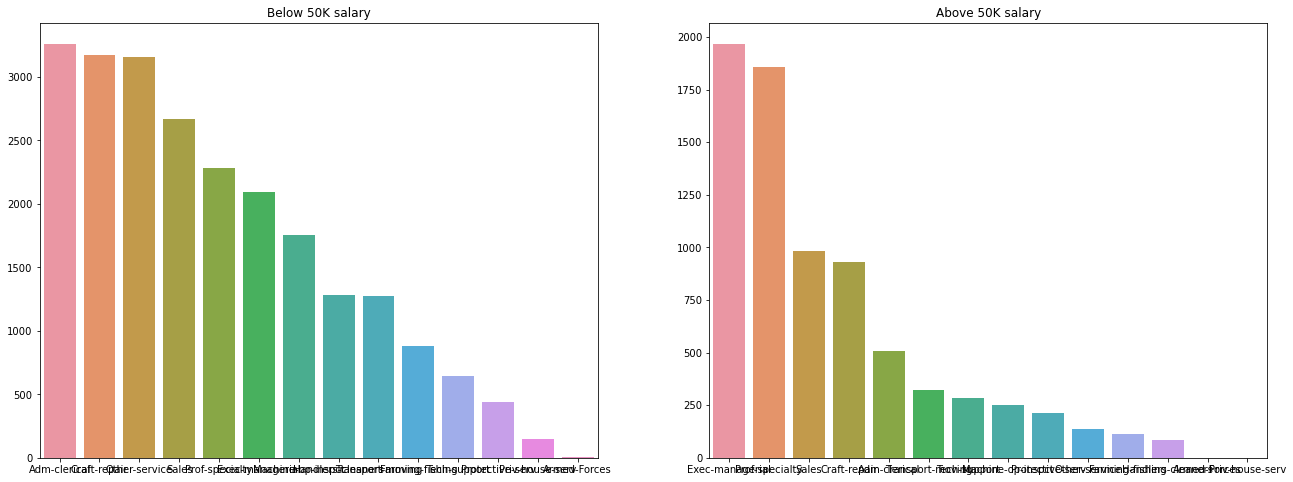

relationship :



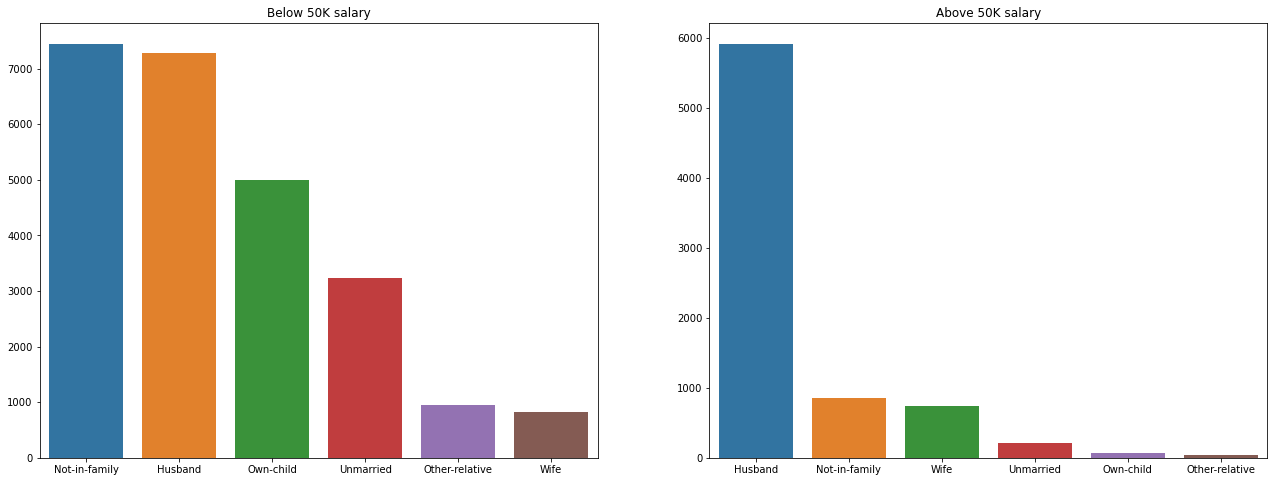

race :



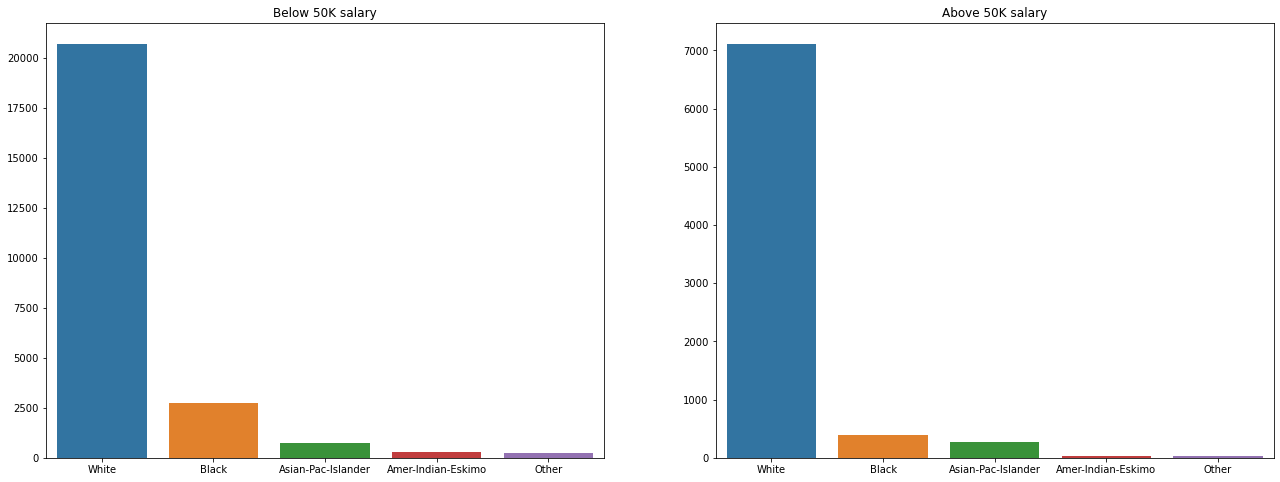

sex :



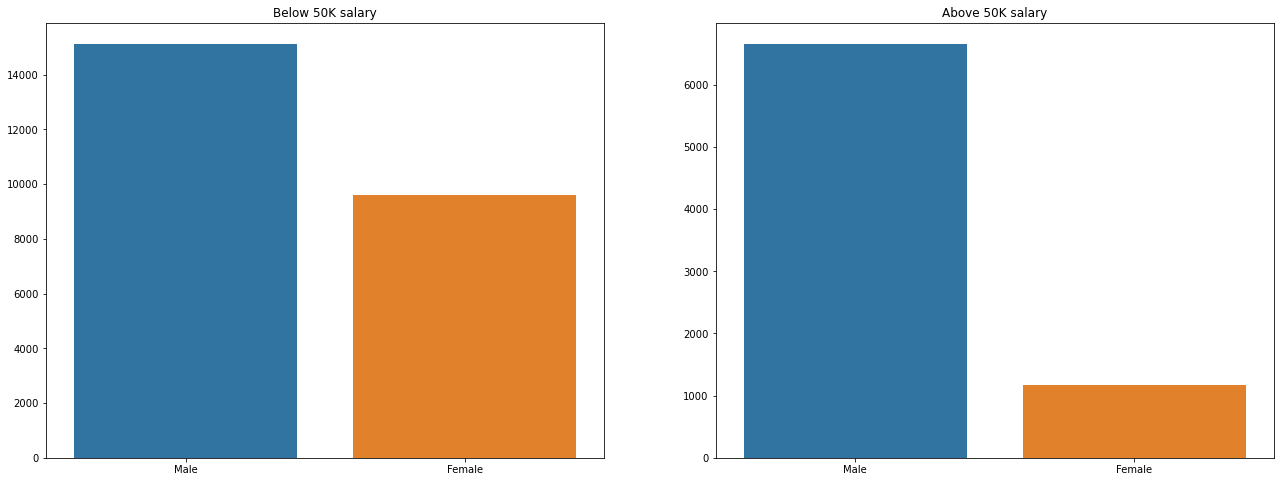

native.country :



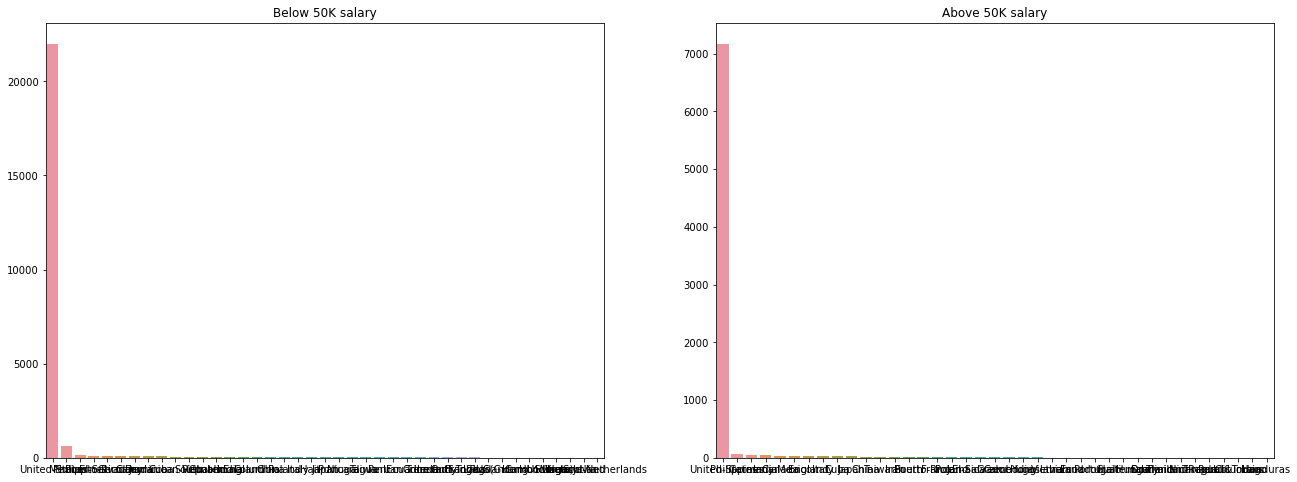

income :



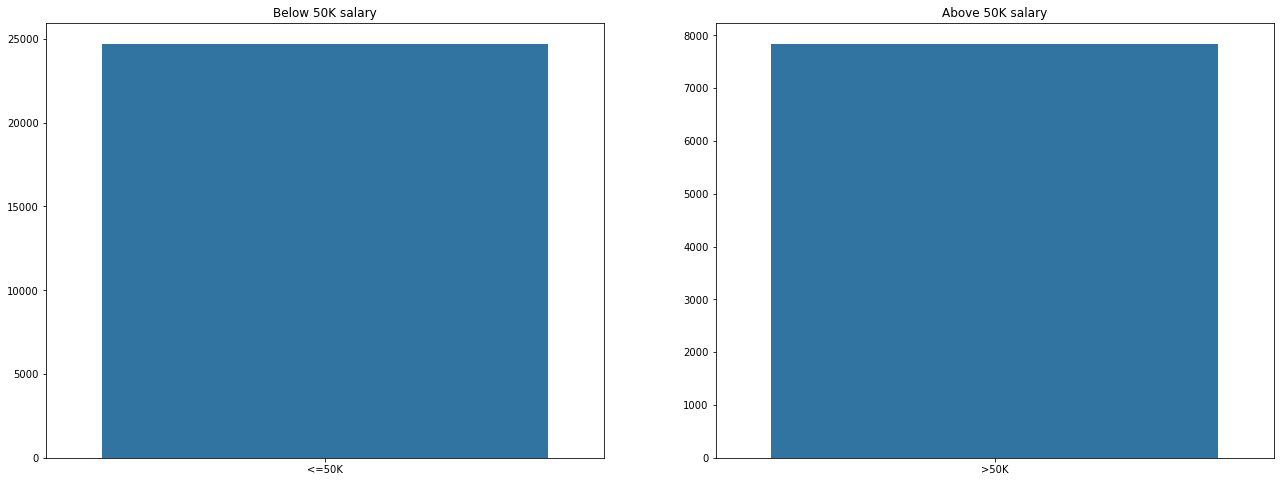

In [19]:
for i in categorical_feature:
    print(i,':\n')
    cate_feature(df,i)
  


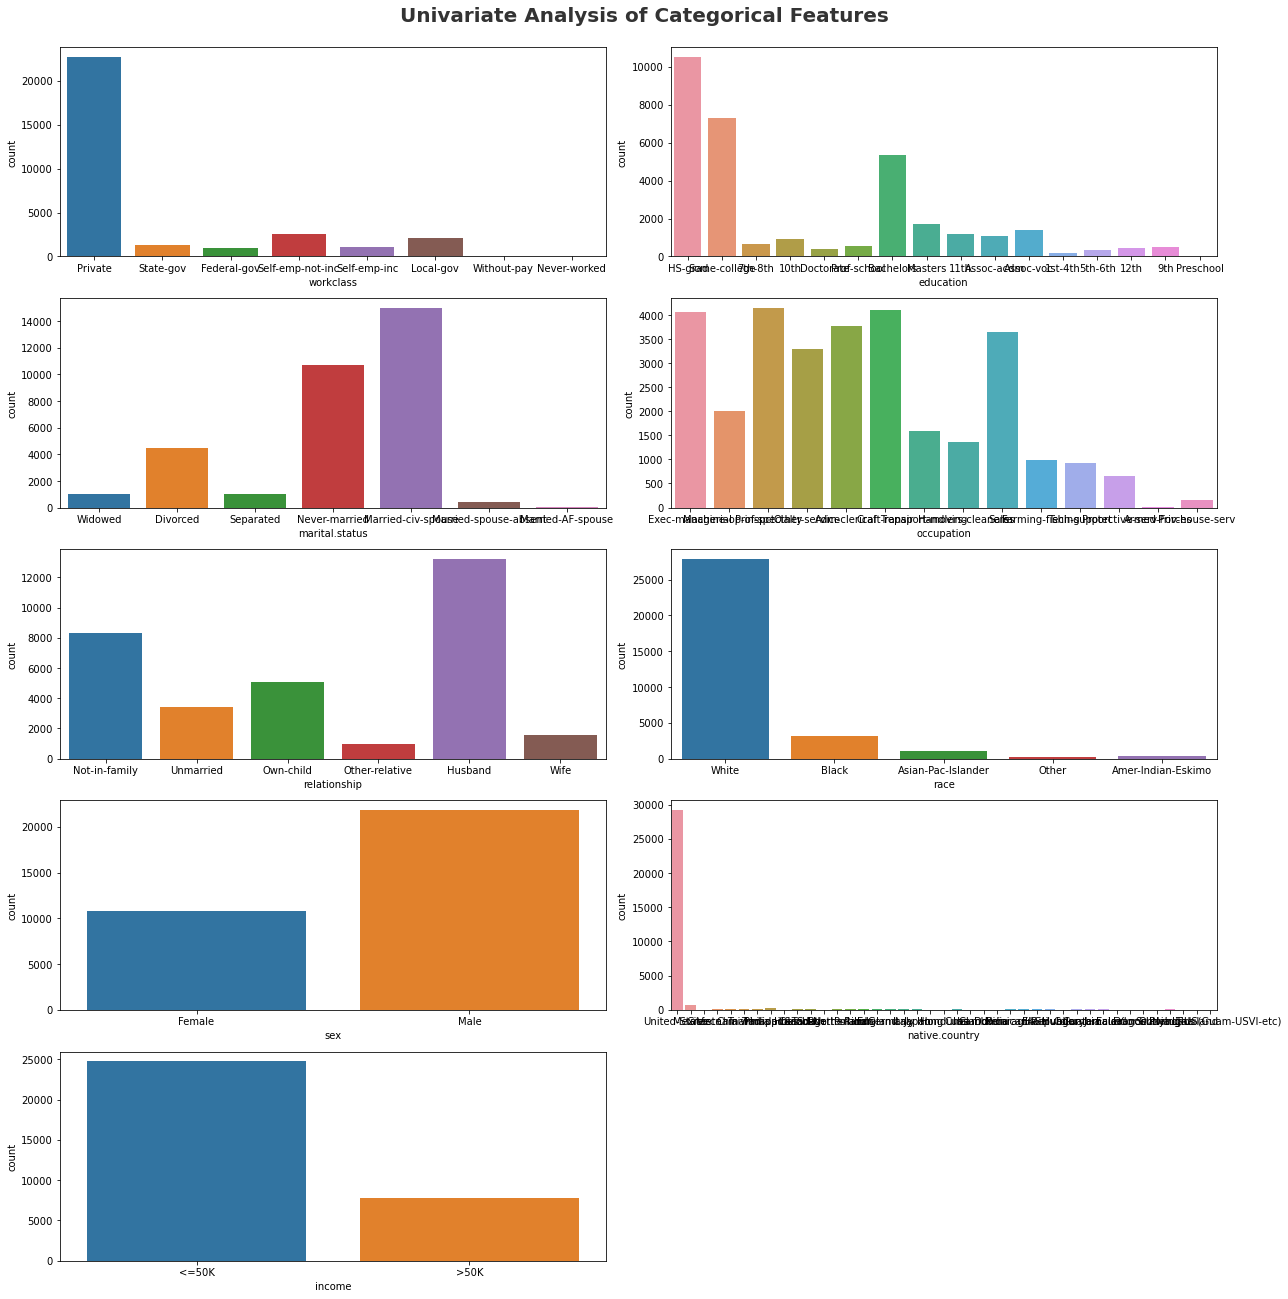

In [20]:
plt.figure(figsize=(18,18))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_feature)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[categorical_feature[i]],data=df)
    plt.xlabel(categorical_feature[i])
    plt.tight_layout()

<AxesSubplot:xlabel='education', ylabel='count'>

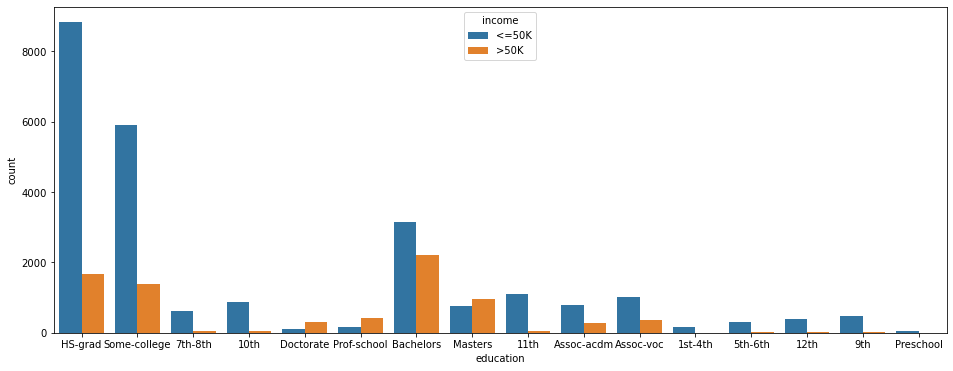

In [21]:
plt.figure(figsize=(16,6))
sns.countplot(x="education",hue="income",data=df)

<AxesSubplot:xlabel='workclass', ylabel='count'>

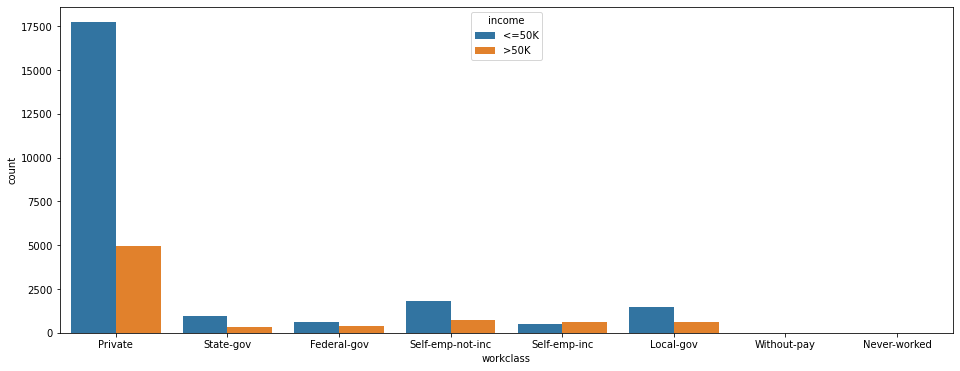

In [22]:
plt.figure(figsize=(16,6))
sns.countplot(x="workclass",hue="income",data=df)

<AxesSubplot:xlabel='age', ylabel='hours.per.week'>

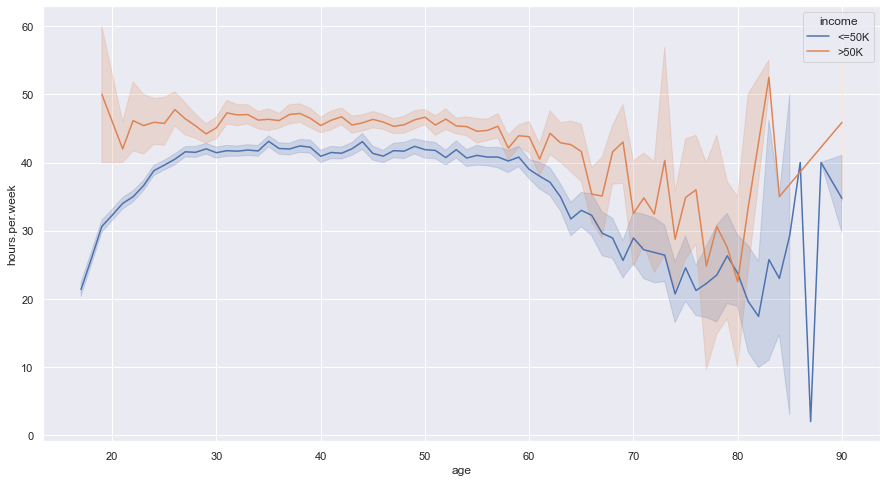

In [23]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x='age', y='hours.per.week',
             hue="income",
             data=df)

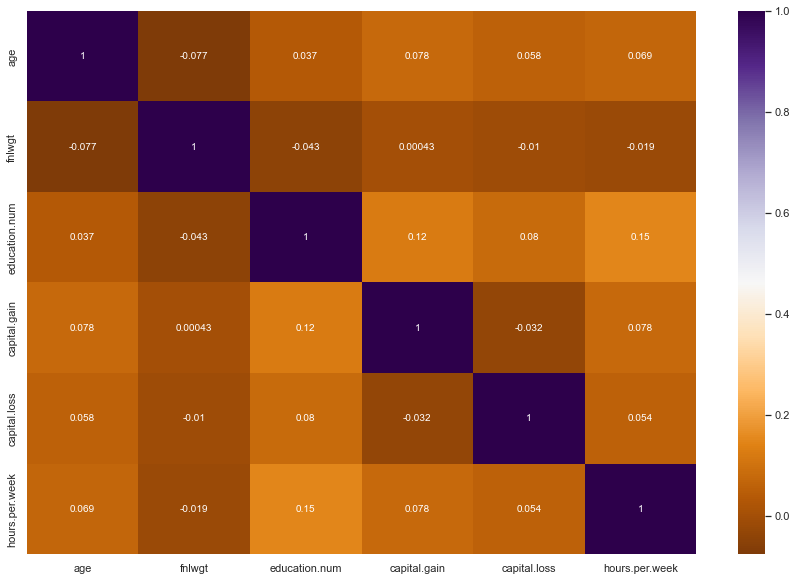

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="PuOr", annot_kws={"size": 10})
plt.show()

## Feature Engineering

In [25]:
df=df.dropna(axis=0)

<AxesSubplot:>

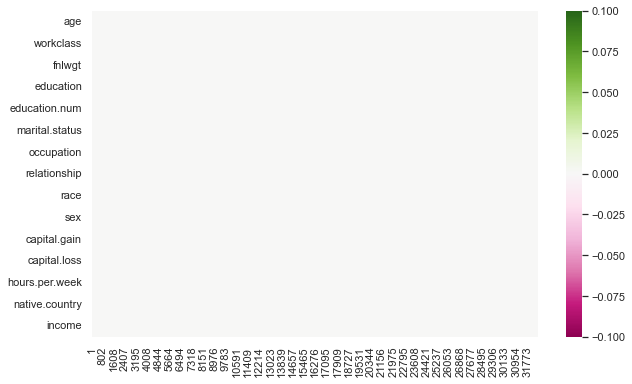

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
           cmap="PiYG")

### Label Encoding for Categorical feature

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()

In [29]:
for i in categorical_feature : 
    df[i] = le.fit_transform(df[i])

In [30]:
df=df.drop(['marital.status','relationship','capital.gain','capital.loss',],axis=1)

In [31]:
df.head()

,age,workclass,fnlwgt,education,education.num,occupation,race,sex,hours.per.week,native.country,income
1,82,2,132870,11,9,3,4,0,18,38,0
3,54,2,140359,5,4,6,4,0,40,38,0
4,41,2,264663,15,10,9,4,0,40,38,0
5,34,2,216864,11,9,7,4,0,45,38,0
6,38,2,150601,0,6,0,4,1,40,38,0


In [32]:
X=df.drop(['income'],axis=1)
y=df['income']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [34]:
X_train.shape

(20208, 10)

In [35]:
y_train.shape

(20208,)

In [36]:
X_test.shape

(9954, 10)

In [37]:
y_test.shape

(9954,)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


## Decision Tree Classifier

In [39]:
dc=DecisionTreeClassifier()

In [40]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
dc.score(X_train,y_train)

0.9998020585906572

In [42]:
dc_pred=dc.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [44]:
accuracy_score(y_test,dc_pred)

0.7458308217801889

In [45]:
print(classification_report(y_test,dc_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7458
           1       0.49      0.50      0.50      2496

    accuracy                           0.75      9954
   macro avg       0.66      0.66      0.66      9954
weighted avg       0.75      0.75      0.75      9954



In [46]:
grid_param_dc = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [47]:
from sklearn.model_selection import GridSearchCV
grid_search_dc=GridSearchCV(estimator=dc,param_grid=grid_param_dc,cv=3,verbose=1)

In [48]:
grid_search_dc.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [49]:
grid_search_dc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'splitter': 'random'}

In [50]:
dc_model_with_best_parm=DecisionTreeClassifier(criterion='gini',
 max_depth= 5,
 min_samples_leaf=6,
 min_samples_split= 2,
 splitter= 'best')

In [51]:
dc_model_with_best_parm.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6)

In [52]:
pred_dc_model_with_best_parm=dc_model_with_best_parm.predict(X_test)

In [53]:
print(accuracy_score(y_test,pred_dc_model_with_best_parm))

0.7976692786819369


In [54]:
print(classification_report(y_test,pred_dc_model_with_best_parm))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      7458
           1       0.67      0.38      0.49      2496

    accuracy                           0.80      9954
   macro avg       0.74      0.66      0.68      9954
weighted avg       0.78      0.80      0.78      9954



In [55]:
print(confusion_matrix(y_test,pred_dc_model_with_best_parm))

[[6980  478]
 [1536  960]]


## RandomForestClassifier

In [56]:
rf= RandomForestClassifier()

In [57]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
rf.score(X_train,y_train)

0.9997525732383215

In [59]:
rf_pred=rf.predict(X_test)

In [60]:
print(accuracy_score(y_test,rf_pred))

0.7958609604179224


In [61]:
rf_grid_param = {
    "n_estimators" : [90,100,110,120],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [62]:
from tpot import TPOTClassifier

In [63]:
rf_tpot_classifier = TPOTClassifier(generations= 5, population_size= 28, offspring_size= 14,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': rf_grid_param}, 
                                 cv = 5, scoring = 'accuracy')

In [64]:
rf_tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/98 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8133910201238885

Generation 2 - Current best internal CV score: 0.8133910201238885

Generation 3 - Current best internal CV score: 0.8134405985359614

Generation 4 - Current best internal CV score: 0.8138856042731719

Generation 5 - Current best internal CV score: 0.8138856042731719

Best pipeline: RandomForestClassifier(RandomForestClassifier(input_matrix, criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=90), criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=110)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': range(2, 20),
                                                                        'max_features': ['auto',
                                                                                         'log2'],
                                                                        'min_samples_leaf': range(1, 10),
                                                                        'min_samples_split': range(2, 10),
                                                                        'n_estimators': [90,
                                                                                         100,
                                                                                         110,
                                                                                         120]}},
               early_stop=12, generations=5, offspring_size=14,
               population_size=28, scoring='accuracy', verbosity=2)

In [65]:

rf_accuracy = rf_tpot_classifier.score(X_test, y_test)
print(rf_accuracy)

0.8089210367691381


In [66]:
rf_g_pred=rf_tpot_classifier.predict(X_test)

In [67]:
print(accuracy_score(y_test,rf_g_pred))

0.8089210367691381


In [68]:
#grid_search_rf=GridSearchCV(estimator=rf,param_grid=rf_grid_param,cv=3,verbose=1)

In [69]:
#grid_search_rf.fit(X_train,y_train)

# SVC

In [70]:
sv=SVC()

In [71]:
sv.fit(X_train,y_train)

SVC()

In [72]:
sv.score(X_train,y_train)

0.7519794140934284

In [73]:
sv_pred=sv.predict(X_test)

In [74]:
print(accuracy_score(y_test,sv_pred))

0.7492465340566606


In [75]:
sv_grid_param = {
    "C" : [0.1,1,2,5,10,100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'gamma':['scale', 'auto']
}

In [76]:
#grid_search_svm=GridSearchCV(estimator=sv,param_grid=sv_grid_param,cv=3,verbose=1)

In [77]:
#grid_search_svm.fit(X_train,y_train)

In [78]:
#from sklearn.model_selection import RandomizedSearchCV

In [79]:
#sv_randomcv=RandomizedSearchCV(estimator=sv,param_distributions=sv_grid_param ,n_iter=100,cv=3,verbose=2,
                               #random_state=100,n_jobs=-1)

In [80]:
#sv_randomcv.fit(X_train,y_train)

In [81]:
#sv_tpot_classifier = TPOTClassifier(generations= 5, population_size= 28, offspring_size= 14,
                                 #verbosity= 2, early_stop= 12,
                                 #config_dict={'sklearn.svm.SVC': sv_grid_param}, 
                                 #cv = 5, scoring = 'accuracy')

In [82]:
#sv_tpot_classifier.fit(X_train,y_train)

# BaggingClassifier

In [83]:
bg=BaggingClassifier(n_estimators=10, random_state=0)

In [84]:
bg.fit(X_train,y_train)

BaggingClassifier(random_state=0)

In [85]:
bg.score(X_train,y_train)

0.9825811559778306

In [86]:
bg_pred=bg.predict(X_test)

In [87]:
print(accuracy_score(y_test,bg_pred))

0.7858147478400643


In [88]:
bg_grid_param = {
    "n_estimators" : [10,20,30,50,100],
    'max_samples': range(1,10,1),
    'oob_score':[True,False] 
}

In [89]:
grid_search_bg=GridSearchCV(estimator=bg,param_grid=bg_grid_param,cv=3,verbose=1)

In [90]:
grid_search_bg.fit(X_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3, estimator=BaggingClassifier(random_state=0),
             param_grid={'max_samples': range(1, 10),
                         'n_estimators': [10, 20, 30, 50, 100],
                         'oob_score': [True, False]},
             verbose=1)

In [91]:
grid_search_bg.best_params_

{'max_samples': 6, 'n_estimators': 10, 'oob_score': True}

In [92]:
bg_with_best_parm=BaggingClassifier(n_estimators=10,max_samples=6 ,oob_score=True)

In [93]:
bg_with_best_parm.fit(X_train,y_train)

BaggingClassifier(max_samples=6, oob_score=True)

In [94]:
bg_with_best_parm_pred=bg_with_best_parm.predict(X_test)

In [95]:
print(accuracy_score(y_test,bg_with_best_parm_pred))

0.7427164958810528


# ExtraTreesClassifier

In [96]:
et=ExtraTreesClassifier()

In [97]:
et.fit(X_train,y_train)

ExtraTreesClassifier()

In [98]:
et_pred=et.predict(X_test)

In [99]:
print(accuracy_score(y_test,et_pred))

0.7878239903556359


In [100]:
grid_param_et = {
    'n_estimators':range(100,200,20),
    'criterion': ['gini','entropy','log_loss'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'max_features' : ['sqrt', 'log2']
    
}

In [101]:
#grid_search_et=GridSearchCV(estimator=et,param_grid=grid_param_et,cv=3,verbose=1)

In [102]:
#grid_search_et.fit(X_train,y_train)

In [103]:
et_tpot_classifier = TPOTClassifier(generations= 5, population_size= 28, offspring_size= 14,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.ExtraTreesClassifier': grid_param_et}, 
                                 cv = 5, scoring = 'accuracy')

In [104]:
et_tpot_classifier.fit(X_train,y_train)

Optimization Progress:   0%|          | 0/98 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.80616601653928

Generation 2 - Current best internal CV score: 0.8115597534964779

Generation 3 - Current best internal CV score: 0.8115597534964779

Generation 4 - Current best internal CV score: 0.8115597534964779

Generation 5 - Current best internal CV score: 0.8132422114200303

Best pipeline: ExtraTreesClassifier(ExtraTreesClassifier(ExtraTreesClassifier(CombineDFs(input_matrix, input_matrix), criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100), criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=140), criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=140)


TPOTClassifier(config_dict={'sklearn.ensemble.ExtraTreesClassifier': {'criterion': ['gini',
                                                                                    'entropy',
                                                                                    'log_loss'],
                                                                      'max_depth': range(2, 10),
                                                                      'max_features': ['sqrt',
                                                                                       'log2'],
                                                                      'min_samples_leaf': range(1, 8),
                                                                      'min_samples_split': range(2, 8),
                                                                      'n_estimators': range(100, 200, 20)}},
               early_stop=12, generations=5, offspring_size=14,
               population_size=28, scoring='accuracy', verbosity=2)

In [105]:
et_accuracy = et_tpot_classifier.score(X_test, y_test)
print(et_accuracy)

0.8086196503918023


In [106]:
et_g_pred=et_tpot_classifier.predict(X_test)

In [107]:
print(accuracy_score(y_test,et_g_pred))

0.8086196503918023


# AdaBoostClassifier

In [108]:
from sklearn.ensemble import AdaBoostClassifier

In [109]:
ad=AdaBoostClassifier()

In [110]:
ad.fit(X_train,y_train)

AdaBoostClassifier()

In [111]:
ad.score(X_train,y_train)

0.8135886777513855

In [112]:
ad_pred=ad.predict(X_test)

In [113]:
print(accuracy_score(y_test,ad_pred))

0.8089210367691381


In [114]:
grid_param_ad = {
    'n_estimators':range(50,100,10),
    'learning_rate':[0.01,1.0,2.0,5.0,10.0,100.0],
    'algorithm':['SAMME','SAMME.R']
    
}

In [115]:
grid_search_ad=GridSearchCV(estimator=ad,param_grid=grid_param_ad,cv=3,verbose=1)

In [116]:
grid_search_ad.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 1.0, 2.0, 5.0, 10.0, 100.0],
                         'n_estimators': range(50, 100, 10)},
             verbose=1)

In [117]:
grid_search_ad.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 90}

In [118]:
grid_search_ad_with_best_parm = AdaBoostClassifier(n_estimators =90,algorithm='SAMME.R', learning_rate= 1.0, )

In [119]:
grid_search_ad_with_best_parm.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=90)

In [120]:
grid_search_ad_with_best_parm_pred = grid_search_ad_with_best_parm.predict(X_test)

In [121]:
print(accuracy_score(y_test,grid_search_ad_with_best_parm_pred))

0.8081173397629093


# VotingClassifier

In [122]:
#vt=VotingClassifier(estimators=[('DT',dc), ('RF',rf), ('SVM', sv),('ADABOOST',ad)],voting='soft')

In [125]:
#vt.fit(X_train,y_train)
from sklearn.linear_model import LogisticRegression

In [126]:
estimaors=[
    ('RFC',RandomForestClassifier()),
    ('Lr',LogisticRegression()),
    ('ETC',ExtraTreesClassifier(criterion='gini',max_depth=10,min_samples_leaf=2,min_samples_split=10,n_estimators=120)),
    ('BGC',BaggingClassifier(base_estimator=LogisticRegression()))
]

In [131]:
vt = VotingClassifier(estimators=estimaors,voting='hard')

In [132]:
vt.fit(X_train,y_train)

VotingClassifier(estimators=[('RFC', RandomForestClassifier()),
                             ('Lr', LogisticRegression()),
                             ('ETC',
                              ExtraTreesClassifier(max_depth=10,
                                                   min_samples_leaf=2,
                                                   min_samples_split=10,
                                                   n_estimators=120)),
                             ('BGC',
                              BaggingClassifier(base_estimator=LogisticRegression()))])

In [133]:
vt.score(X_train,y_train)

0.7519794140934284

In [134]:
vt_pred = vt.predict(X_test)

In [135]:
print(accuracy_score(y_test,vt_pred))

0.7492465340566606
